In [ ]:
print("Muruga")

Muruga


# **💼 Business Case Overview**
**Project Context:**

I am building this data analysis project for a client who wants to understand the Android app market better and identify the best-performing apps to guide their app development and marketing strategies.

**Objective:**

To identify the most successful Android applications and understand the factors contributing to their success, with a special focus on pricing strategies, to provide actionable insights for the client.

**Key Insights:**

->Top-performing apps usually have high user ratings, large numbers of reviews, and many installs, indicating strong user engagement.

->Paid apps with higher prices may have fewer installs but generate higher revenue per user.

->Free apps with in-app purchases (freemium models) often balance user acquisition with monetization effectively.

**Recommendations for the Client:**

->Invest in improving app quality to boost user ratings and attract more reviews.

->Consider adopting a freemium pricing model to maximize both user base growth and revenue.

->Ensure regular app updates to maintain high user satisfaction and engagement.

# **IMPORT NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **IMPORT DATASET**

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/My Dataset/Copy of googleplaystore.csv")


# **EXPLORATION OF DATA**
BASIC CHECKS OF DATASET

In [ ]:
d.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
d.tail(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
d.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
d.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [ ]:
d.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
d.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
d.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
d.nunique()

,0
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


# **DATA CLEANING & PREPROCESSING**

In [ ]:
# incorrect formatting
df = d[d['App'] != 'App']

In [ ]:
# Change the Review column to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs
count,9367.000000,1.084000e+04,9.145000e+03,1.084000e+04
mean,4.193338,4.441529e+05,2.151653e+07,1.546434e+07
std,0.537431,2.927761e+06,2.258875e+07,8.502936e+07
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00
25%,4.000000,3.800000e+01,4.900000e+06,1.000000e+03
50%,4.300000,2.094000e+03,1.300000e+07,1.000000e+05
75%,4.500000,5.477550e+04,3.000000e+07,5.000000e+06
max,19.000000,7.815831e+07,1.000000e+08,1.000000e+09


In [ ]:
#Remove M from the Size column
def clean_size(value):
    if value.endswith('M'):
        return float(value.replace('M', '')) * 1_000_000
    elif value.endswith('k'):
        return float(value.replace('k', '')) * 1_000
    elif value == 'Varies with device':
        return np.nan
    else:
        return np.nan

df['Size'] = df['Size'].apply(clean_size)

In [ ]:
# replace + from installs
# and change installs column datatype to numeric
df['Installs'] = df['Installs'].astype(str)  # Ensure all are strings
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [ ]:
df['Installs'].unique()[:10]

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08])

In [ ]:
# Replace $ and convert the datatype to float
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

<ipython-input-28-904c1f07668f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)


In [ ]:
df[df['Price'].str.contains('[A-Za-z]', na=False)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df = df[~df['Price'].str.contains('[A-Za-z]', na=False)]

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
# Drop the row with NAN value
df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Android Ver'], inplace=True)

<ipython-input-30-c6a746ad4a17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Android Ver'], inplace=True)


In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

<ipython-input-32-ac7b734dc03d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')


In [ ]:
df['Current Ver'] = df['Current Ver'].replace('Varies with device', np.nan)
df['Android Ver'] = df['Android Ver'].replace('Varies with device', np.nan)

<ipython-input-33-ca65f840db1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Current Ver'] = df['Current Ver'].replace('Varies with device', np.nan)
<ipython-input-33-ca65f840db1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Android Ver'] = df['Android Ver'].replace('Varies with device', np.nan)


In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1637
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
# drop the null value
df.dropna(subset=['Size', 'Current Ver', 'Android Ver'], inplace=True)

<ipython-input-35-97041e2fb245>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Size', 'Current Ver', 'Android Ver'], inplace=True)


In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7637 entries, 0 to 7636
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             7637 non-null   object        
 1   Category        7637 non-null   object        
 2   Rating          7637 non-null   float64       
 3   Reviews         7637 non-null   float64       
 4   Size            7637 non-null   float64       
 5   Installs        7637 non-null   float64       
 6   Type            7637 non-null   object        
 7   Price           7637 non-null   float64       
 8   Content Rating  7637 non-null   object        
 9   Genres          7637 non-null   object        
 10  Last Updated    7637 non-null   datetime64[ns]
 11  Current Ver     7637 non-null   object        
 12  Android Ver     7637 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 775.8+ KB


In [ ]:
from google.colab import files
df.to_csv('darshana_googleplaystore.csv', index=False, encoding='utf-8')
files.download('darshana_googleplaystore.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **NEW DATASET BASIC CHECK**

In [ ]:
# new Data Set Check
new=pd.read_csv("/content/darshana_googleplaystore.csv")

In [ ]:
new.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
new.describe()

,Rating,Reviews,Size,Installs,Price
count,7637.000000,7.637000e+03,7.637000e+03,7.637000e+03,7637.000000
mean,4.172502,2.944081e+05,2.290325e+07,8.165624e+06,1.136429
std,0.546138,1.873040e+06,2.342464e+07,4.940853e+07,17.504658
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.050000e+02,5.200000e+06,1.000000e+04,0.000000
50%,4.300000,2.221000e+03,1.400000e+07,1.000000e+05,0.000000
75%,4.500000,3.788200e+04,3.300000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7637 entries, 0 to 7636
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7637 non-null   object 
 1   Category        7637 non-null   object 
 2   Rating          7637 non-null   float64
 3   Reviews         7637 non-null   float64
 4   Size            7637 non-null   float64
 5   Installs        7637 non-null   float64
 6   Type            7637 non-null   object 
 7   Price           7637 non-null   float64
 8   Content Rating  7637 non-null   object 
 9   Genres          7637 non-null   object 
 10  Last Updated    7637 non-null   object 
 11  Current Ver     7637 non-null   object 
 12  Android Ver     7637 non-null   object 
dtypes: float64(5), object(8)
memory usage: 775.8+ KB


## **DATA ANALYSIS & VISUALIZATION**

**1) Segregate the App Installation based on age and Category**

<Figure size 1500x800 with 0 Axes>

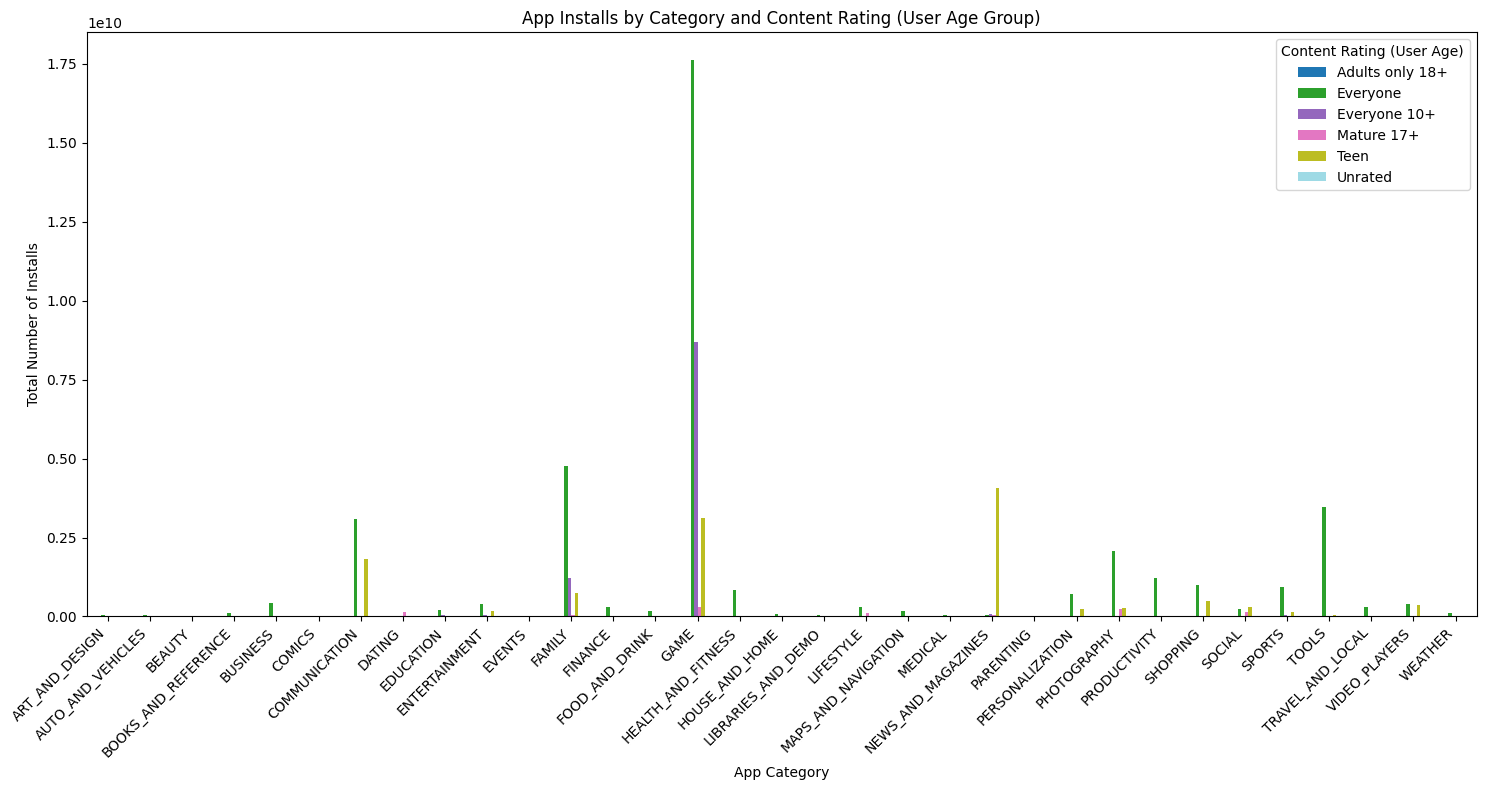

In [ ]:

# Aggregate total installs by Category and Content Rating
installs_by_cat_age = new.groupby(['Category', 'Content Rating'])['Installs'].sum().reset_index()

# Pivot the data to have Content Rating as columns for grouped bar chart
pivot_df = installs_by_cat_age.pivot(index='Category', columns='Content Rating', values='Installs').fillna(0)

# Plotting
plt.figure(figsize=(15, 8))
pivot_df.plot(kind='bar', stacked=False, colormap='tab20', figsize=(15,8))

plt.title('App Installs by Category and Content Rating (User Age Group)')
plt.xlabel('App Category')
plt.ylabel('Total Number of Installs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Rating (User Age)')
plt.tight_layout()
plt.show()


**2) Is Paid Cause Problem of Installation**

<ipython-input-52-4622d2d6e3e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=installs_by_price_type, x='Type', y='Installs', palette='pastel')


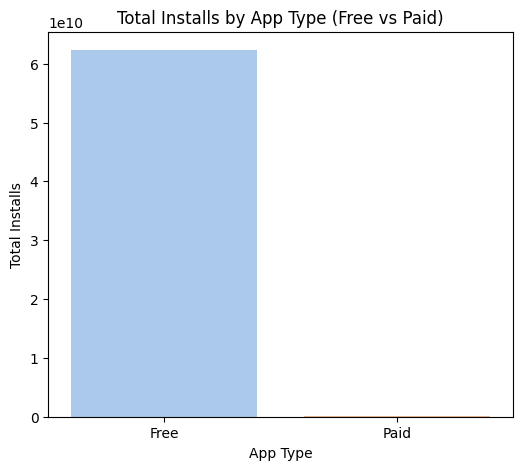

In [ ]:
installs_by_price_type = new.groupby('Type')['Installs'].sum().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=installs_by_price_type, x='Type', y='Installs', palette='pastel')
plt.title('Total Installs by App Type (Free vs Paid)')
plt.ylabel('Total Installs')
plt.xlabel('App Type')
plt.show()

**3) Analyse the Competition in App Building Industries**

<ipython-input-55-336be9b53624>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(competition_df['Category'], rotation=45, ha='right')


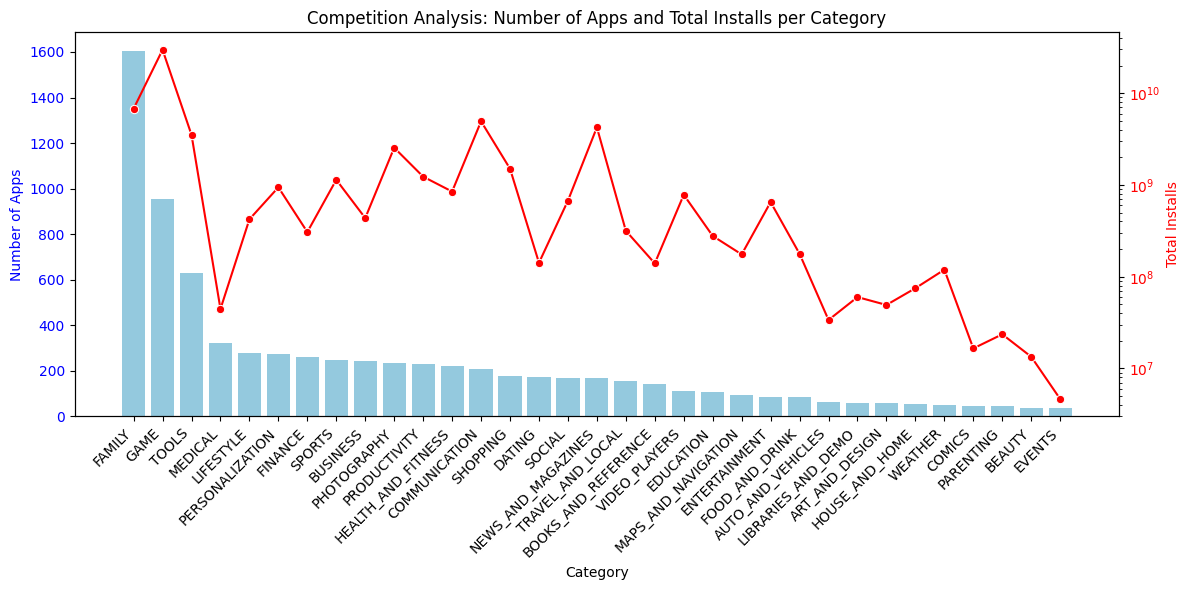

In [ ]:
apps_per_category = new['Category'].value_counts().reset_index()
apps_per_category.columns = ['Category', 'Number of Apps']

# Calculate total installs per category
installs_per_category = new.groupby('Category')['Installs'].sum().reset_index()

# Merge the two metrics
competition_df = pd.merge(apps_per_category, installs_per_category, on='Category')

# Plotting side-by-side bar chart
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x='Category', y='Number of Apps', data=competition_df, color='skyblue', ax=ax1)
ax1.set_ylabel('Number of Apps', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(competition_df['Category'], rotation=45, ha='right')

# Create second y-axis for total installs
ax2 = ax1.twinx()
sns.lineplot(x='Category', y='Installs', data=competition_df, sort=False, marker='o', color='red', ax=ax2)
ax2.set_ylabel('Total Installs', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_yscale('log')  # Log scale to handle large install numbers

plt.title('Competition Analysis: Number of Apps and Total Installs per Category')
plt.tight_layout()
plt.show()


**4) Check the Updation Status based on the Rating**

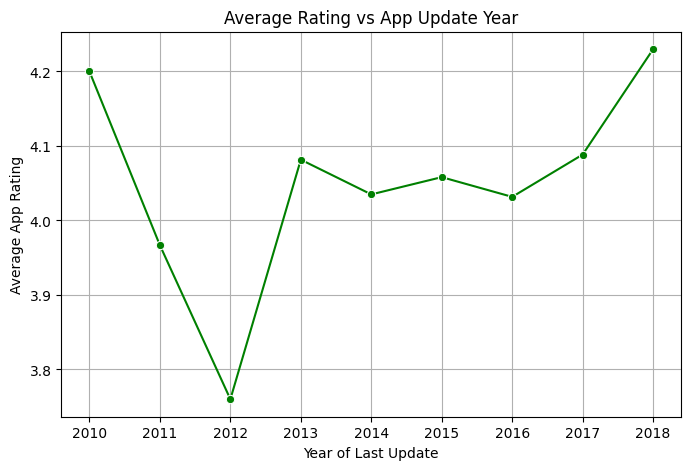

In [ ]:
new['Last Updated'] = pd.to_datetime(new['Last Updated'])

# Extract only the year
new['Update Year'] = new['Last Updated'].dt.year

# Group by year and find average rating
rating_by_year = new.groupby('Update Year')['Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x='Update Year', y='Rating', data=rating_by_year, marker='o', color='green')
plt.title('Average Rating vs App Update Year')
plt.xlabel('Year of Last Update')
plt.ylabel('Average App Rating')
plt.grid(True)
plt.show()

**5) The cost Estimation of the Paid app**

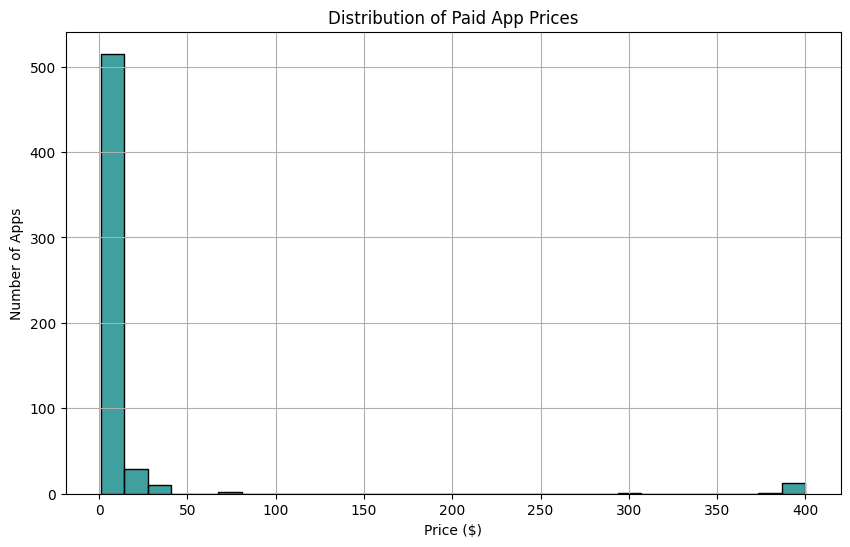

In [ ]:
paid_apps = df[df['Type'] == 'Paid']

# Plot histogram of app prices
plt.figure(figsize=(10,6))
sns.histplot(paid_apps['Price'], bins=30, kde=False, color='teal')
plt.title('Distribution of Paid App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.grid(True)
plt.show()

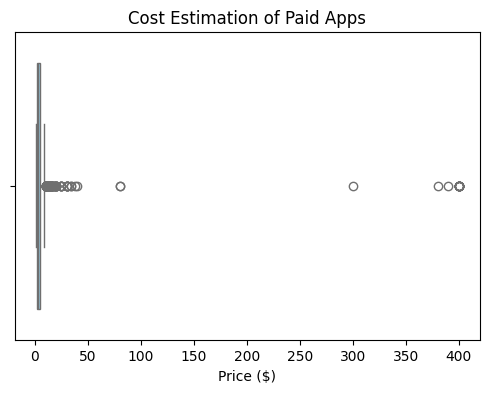

In [ ]:
paid_apps = df[df['Type'] == 'Paid']

# Plot boxplot for price of paid apps
plt.figure(figsize=(6, 4))
sns.boxplot(x=paid_apps['Price'], color='skyblue')
plt.title('Cost Estimation of Paid Apps')
plt.xlabel('Price ($)')
plt.show()
